# Executive Summary

I'm using the environment in the OpenAI gym - Robotics to practice how to train an agent by reinforcement learning. In this notebook, ***A goal position is randomly chosen in 3D space. Control Fetch's end effector to reach that goal as quickly as possible..***

***Found Project Baseline by Using Random Action*** (Section 4)
- By taken random actions ***The fetch fail to pick up anything at all***
- At the end of each episode score receive -50 all the time. 

***Using stable_baselines3 PPO model to traing the Agent*** (Section 5)
- We would like the ***Mean Reward*** keep going as higher as possible, it ***stop at 1.1 million timesteps around -4.4*** (time spend 36min 42s)
- Compare to the average reward -50 by taking random action before learning, ***the agent perform significantly better. The fetch directly reach the red ball immediatly all the time***.


### ***Table of Content:***
1. What is FetchReach-v1
2. Import Dependencies
3. Understanding The Environment
4. Found Project Baseline by Using Random Action
5. Using Stable_baselines3 PPO model

# 1. What is FetchReach-v1

<img src='http://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/FetchReach-v1/poster.jpg'>

***Goal***
- ***A goal position is randomly chosen in 3D space. Control Fetch's end effector to reach that goal as quickly as possible..***.

# 2. Import Dependencies

objc[1991]: Class GLFWApplicationDelegate is implemented in both /Users/hoikinyu/.mujoco/mujoco200/bin/libglfw.3.dylib (0x104342778) and /Users/hoikinyu/opt/anaconda3/lib/python3.8/site-packages/glfw/libglfw.3.dylib (0x10473a7c0). One of the two will be used. Which one is undefined.
objc[1991]: Class GLFWWindowDelegate is implemented in both /Users/hoikinyu/.mujoco/mujoco200/bin/libglfw.3.dylib (0x104342700) and /Users/hoikinyu/opt/anaconda3/lib/python3.8/site-packages/glfw/libglfw.3.dylib (0x10473a7e8). One of the two will be used. Which one is undefined.
objc[1991]: Class GLFWContentView is implemented in both /Users/hoikinyu/.mujoco/mujoco200/bin/libglfw.3.dylib (0x1043427a0) and /Users/hoikinyu/opt/anaconda3/lib/python3.8/site-packages/glfw/libglfw.3.dylib (0x10473a838). One of the two will be used. Which one is undefined.
objc[1991]: Class GLFWWindow is implemented in both /Users/hoikinyu/.mujoco/mujoco200/bin/libglfw.3.dylib (0x104342818) and /Users/hoikinyu/opt/anaconda3/lib/pyt

Creating offscreen glfw


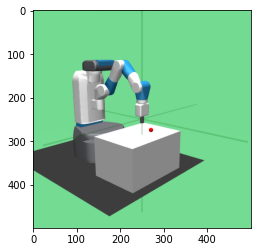

In [1]:
import mujoco_py
import os

import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FetchReach-v1')                 # Using Humanoid verion 2 in this notebook
env.reset()                                            # reset the environment to initial default

plt.imshow(env.render('rgb_array'))                    # display the environment

# 3. Understanding The Environment

In [2]:
state = env.reset()

print("There are %d states in observation:" % len(state), state)

There are 3 states in observation: {'observation': array([ 1.34183265e+00,  7.49100387e-01,  5.34722720e-01,  1.97805133e-04,
        7.15193042e-05,  7.73933014e-06,  5.51992816e-08, -2.42927453e-06,
        4.73325650e-06, -2.28455228e-06]), 'achieved_goal': array([1.34183265, 0.74910039, 0.53472272]), 'desired_goal': array([1.28130056, 0.75054024, 0.49239855])}


In [3]:
action = env.action_space.sample()

print("There are %d motor speed values in the range [-1, 1]:" % len(action), action)

There are 4 motor speed values in the range [-1, 1]: [-0.68244773  0.25926995 -0.86145955 -0.50329095]


# 4. Found Project Baseline by Using Random Action

In [17]:
%%time
episodes = 5

for episode in range(1, episodes + 1):                     # looping from 1 to 5
    
    state = env.reset()                                    # initial the set of observation
    
    done = False                                           # initial the game is over = False, until reach maximum number of steps in this particular environment
    
    score = 0                                              # running score counter
    
    timesteps_counter = 0                                  # count the number of timestep spend
    
    while not done:
        
        env.render()                                       # view the graphical representation that environment
        
        action = env.action_space.sample()                 # random choose an action 
        
        new_state, reward, done, info = env.step(action)   # pass random actions into environment to get back
                                                            # 1. next set of observation
                                                            # 2. reward
                                                            # 3. done (episode is done = True)
        
        score += reward                                    # accumulate each episodes' reward received into score
        
        state = new_state                                  # update state
        
        timesteps_counter += 1                             # +1 in each timestep spend
        
    print('Episode:{} Score:{} Timesteps Spend:{}'.format(episode, score,timesteps_counter))    # print out score for each episode

Creating window glfw
Episode:1 Score:-50.0 Timesteps Spend:50
Episode:2 Score:-50.0 Timesteps Spend:50
Episode:3 Score:-50.0 Timesteps Spend:50
Episode:4 Score:-50.0 Timesteps Spend:50
Episode:5 Score:-39.0 Timesteps Spend:50
CPU times: user 1.52 s, sys: 855 ms, total: 2.37 s
Wall time: 10.6 s


Remark: 
- The above 5 episode showing that, by taken random actions ***The fetch fail to pick up anything at all***
- At the end of each episode score receive -50 all the time. 

# 5. Using Stable_baselines3 PPO model

In [4]:
# Import dependency
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

# Import Base Callback for saving models
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold


# Save the trained model into train directory
save_path = os.path.join('Training', 'FetchReach_5M_timesteps')

# Save the log into log directory
log_path = './logs/FetchReach_5M_timesteps'

stop_callback = StopTrainingOnRewardThreshold(reward_threshold = -10,    # stop traing when achieve -10 reward
                                              verbose = 2
                                             )  

eval_callback = EvalCallback(env, 
                             callback_on_new_best = stop_callback,         # every time new best model, then run stop_callback. When stop_callback achieve 200000 reward, then stop the training
                             eval_freq = 100000,                           # set how often to run eval_callback 
                             best_model_save_path = save_path,
                             verbose = 1
                            )

env = DummyVecEnv([lambda: env])              # Environment creation function

PPO_model = PPO('MultiInputPolicy',
            env,
            tensorboard_log = log_path, 
            verbose = 1, 
            learning_rate = 0.00001,
            clip_range = 0.1,                # if smaller n_steps number, clip_range should lower
            gamma = 0.95,
            gae_lambda = 0.9,                # if smaller n_steps number, clip_range should lower
            n_steps = 8192                   # Should be factor of mini-batch, that is 16 in this case
                                              # 8192 here means that 8192 sets of observations actions, log probabilities & values will be stored in the buffer for one iteration 
           )

Using cpu device


In [5]:
%%time
PPO_model.learn(total_timesteps = 5000000,   # 5 Million timesteps
            callback = eval_callback
           )

Logging to ./logs/FetchReach_5M_timesteps/PPO_2
-----------------------------
| time/              |      |
|    fps             | 460  |
|    iterations      | 1    |
|    time_elapsed    | 17   |
|    total_timesteps | 8192 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 463          |
|    iterations           | 2            |
|    time_elapsed         | 35           |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 0.0009005507 |
|    clip_fraction        | 0.00531      |
|    clip_range           | 0.1          |
|    entropy_loss         | -5.68        |
|    explained_variance   | 0.000462     |
|    learning_rate        | 1e-05        |
|    loss                 | 7.14         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.000554    |
|    std                  | 1            |
|    value_

------------------------------------------
| time/                   |              |
|    fps                  | 444          |
|    iterations           | 12           |
|    time_elapsed         | 221          |
|    total_timesteps      | 98304        |
| train/                  |              |
|    approx_kl            | 0.0011306342 |
|    clip_fraction        | 0.0233       |
|    clip_range           | 0.1          |
|    entropy_loss         | -5.67        |
|    explained_variance   | 0.00245      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.503        |
|    n_updates            | 110          |
|    policy_gradient_loss | -0.00124     |
|    std                  | 0.997        |
|    value_loss           | 1.82         |
------------------------------------------


/Users/hoikinyu/opt/anaconda3/lib/python3.8/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=100000, episode_reward=-50.00 +/- 0.00
Episode length: 50.00 +/- 0.00
Success rate: 0.00%
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 50           |
|    mean_reward          | -50          |
|    success_rate         | 0.0          |
| time/                   |              |
|    total_timesteps      | 100000       |
| train/                  |              |
|    approx_kl            | 0.0009119994 |
|    clip_fraction        | 0.00745      |
|    clip_range           | 0.1          |
|    entropy_loss         | -5.67        |
|    explained_variance   | 0.00218      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.264        |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.000517    |
|    std                  | 0.998        |
|    value_loss           | 1.23         |
------------------------------------------
New best mean reward!
---------

------------------------------------------
| time/                   |              |
|    fps                  | 454          |
|    iterations           | 23           |
|    time_elapsed         | 414          |
|    total_timesteps      | 188416       |
| train/                  |              |
|    approx_kl            | 0.0010790098 |
|    clip_fraction        | 0.00859      |
|    clip_range           | 0.1          |
|    entropy_loss         | -5.63        |
|    explained_variance   | 1.75e-05     |
|    learning_rate        | 1e-05        |
|    loss                 | 0.19         |
|    n_updates            | 220          |
|    policy_gradient_loss | -0.00068     |
|    std                  | 0.988        |
|    value_loss           | 0.186        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 454           |
|    iterations           | 24            |
|    ti

------------------------------------------
| time/                   |              |
|    fps                  | 452          |
|    iterations           | 33           |
|    time_elapsed         | 597          |
|    total_timesteps      | 270336       |
| train/                  |              |
|    approx_kl            | 0.0009765155 |
|    clip_fraction        | 0.0124       |
|    clip_range           | 0.1          |
|    entropy_loss         | -5.57        |
|    explained_variance   | -6.91e-06    |
|    learning_rate        | 1e-05        |
|    loss                 | 0.101        |
|    n_updates            | 320          |
|    policy_gradient_loss | -0.000691    |
|    std                  | 0.974        |
|    value_loss           | 0.129        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 451           |
|    iterations           | 34            |
|    ti

-------------------------------------------
| time/                   |               |
|    fps                  | 459           |
|    iterations           | 43            |
|    time_elapsed         | 766           |
|    total_timesteps      | 352256        |
| train/                  |               |
|    approx_kl            | 0.00081934396 |
|    clip_fraction        | 0.00266       |
|    clip_range           | 0.1           |
|    entropy_loss         | -5.51         |
|    explained_variance   | 1.1e-05       |
|    learning_rate        | 1e-05         |
|    loss                 | 0.081         |
|    n_updates            | 420           |
|    policy_gradient_loss | -0.000378     |
|    std                  | 0.959         |
|    value_loss           | 0.149         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 460          |
|    iterations           | 44     

-------------------------------------------
| time/                   |               |
|    fps                  | 469           |
|    iterations           | 53            |
|    time_elapsed         | 924           |
|    total_timesteps      | 434176        |
| train/                  |               |
|    approx_kl            | 0.00085424253 |
|    clip_fraction        | 0.00736       |
|    clip_range           | 0.1           |
|    entropy_loss         | -5.46         |
|    explained_variance   | 2.01e-05      |
|    learning_rate        | 1e-05         |
|    loss                 | 0.023         |
|    n_updates            | 520           |
|    policy_gradient_loss | -0.000563     |
|    std                  | 0.946         |
|    value_loss           | 0.188         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 470          |
|    iterations           | 54     

-------------------------------
| time/              |        |
|    fps             | 476    |
|    iterations      | 62     |
|    time_elapsed    | 1066   |
|    total_timesteps | 507904 |
-------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 476          |
|    iterations           | 63           |
|    time_elapsed         | 1082         |
|    total_timesteps      | 516096       |
| train/                  |              |
|    approx_kl            | 0.0010254219 |
|    clip_fraction        | 0.00951      |
|    clip_range           | 0.1          |
|    entropy_loss         | -5.4         |
|    explained_variance   | -9.18e-06    |
|    learning_rate        | 1e-05        |
|    loss                 | 0.014        |
|    n_updates            | 620          |
|    policy_gradient_loss | -0.000609    |
|    std                  | 0.933        |
|    value_loss           | 0.257        |
--

------------------------------------------
| time/                   |              |
|    fps                  | 482          |
|    iterations           | 73           |
|    time_elapsed         | 1239         |
|    total_timesteps      | 598016       |
| train/                  |              |
|    approx_kl            | 0.0005032498 |
|    clip_fraction        | 0.00155      |
|    clip_range           | 0.1          |
|    entropy_loss         | -5.36        |
|    explained_variance   | -2.91e-05    |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0916       |
|    n_updates            | 720          |
|    policy_gradient_loss | -0.000341    |
|    std                  | 0.924        |
|    value_loss           | 0.258        |
------------------------------------------
Eval num_timesteps=600000, episode_reward=-47.60 +/- 4.80
Episode length: 50.00 +/- 0.00
Success rate: 20.00%
------------------------------------------
| eval/                   |   

------------------------------------------
| time/                   |              |
|    fps                  | 487          |
|    iterations           | 83           |
|    time_elapsed         | 1395         |
|    total_timesteps      | 679936       |
| train/                  |              |
|    approx_kl            | 0.0009019356 |
|    clip_fraction        | 0.0149       |
|    clip_range           | 0.1          |
|    entropy_loss         | -5.3         |
|    explained_variance   | 3.85e-05     |
|    learning_rate        | 1e-05        |
|    loss                 | 0.227        |
|    n_updates            | 820          |
|    policy_gradient_loss | -0.000834    |
|    std                  | 0.911        |
|    value_loss           | 0.383        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 487          |
|    iterations           | 84           |
|    time_e

-------------------------------------------
| time/                   |               |
|    fps                  | 491           |
|    iterations           | 93            |
|    time_elapsed         | 1551          |
|    total_timesteps      | 761856        |
| train/                  |               |
|    approx_kl            | 0.00081828085 |
|    clip_fraction        | 0.0185        |
|    clip_range           | 0.1           |
|    entropy_loss         | -5.24         |
|    explained_variance   | -2.01e-05     |
|    learning_rate        | 1e-05         |
|    loss                 | 0.155         |
|    n_updates            | 920           |
|    policy_gradient_loss | -0.00112      |
|    std                  | 0.897         |
|    value_loss           | 0.507         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 491          |
|    iterations           | 94     

------------------------------------------
| time/                   |              |
|    fps                  | 494          |
|    iterations           | 103          |
|    time_elapsed         | 1707         |
|    total_timesteps      | 843776       |
| train/                  |              |
|    approx_kl            | 0.0007878292 |
|    clip_fraction        | 0.0205       |
|    clip_range           | 0.1          |
|    entropy_loss         | -5.19        |
|    explained_variance   | 3.59e-05     |
|    learning_rate        | 1e-05        |
|    loss                 | 0.32         |
|    n_updates            | 1020         |
|    policy_gradient_loss | -0.00164     |
|    std                  | 0.886        |
|    value_loss           | 0.832        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 494          |
|    iterations           | 104          |
|    time_e

------------------------------------------
| time/                   |              |
|    fps                  | 496          |
|    iterations           | 113          |
|    time_elapsed         | 1864         |
|    total_timesteps      | 925696       |
| train/                  |              |
|    approx_kl            | 0.0005211673 |
|    clip_fraction        | 0.00979      |
|    clip_range           | 0.1          |
|    entropy_loss         | -5.13        |
|    explained_variance   | 3.09e-05     |
|    learning_rate        | 1e-05        |
|    loss                 | 0.774        |
|    n_updates            | 1120         |
|    policy_gradient_loss | -0.00154     |
|    std                  | 0.873        |
|    value_loss           | 1.04         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 496          |
|    iterations           | 114          |
|    time_e

New best mean reward!
--------------------------------
| time/              |         |
|    fps             | 498     |
|    iterations      | 123     |
|    time_elapsed    | 2022    |
|    total_timesteps | 1007616 |
--------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 498           |
|    iterations           | 124           |
|    time_elapsed         | 2038          |
|    total_timesteps      | 1015808       |
| train/                  |               |
|    approx_kl            | 0.00059325795 |
|    clip_fraction        | 0.00726       |
|    clip_range           | 0.1           |
|    entropy_loss         | -5.05         |
|    explained_variance   | 0.0099        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.857         |
|    n_updates            | 1230          |
|    policy_gradient_loss | -0.00165      |
|    std                  | 0.855         |

-------------------------------------------
| time/                   |               |
|    fps                  | 499           |
|    iterations           | 134           |
|    time_elapsed         | 2195          |
|    total_timesteps      | 1097728       |
| train/                  |               |
|    approx_kl            | 0.00068068824 |
|    clip_fraction        | 0.0156        |
|    clip_range           | 0.1           |
|    entropy_loss         | -4.95         |
|    explained_variance   | 0.0432        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.971         |
|    n_updates            | 1330          |
|    policy_gradient_loss | -0.00279      |
|    std                  | 0.835         |
|    value_loss           | 2.29          |
-------------------------------------------
Eval num_timesteps=1100000, episode_reward=-4.40 +/- 1.50
Episode length: 50.00 +/- 0.00
Success rate: 100.00%
------------------------------------------
| eval/   

Log Explanation: 

time/
- ***fps - frame per second:*** how fast is the learning processing
- ***iterations:*** currently in which iteration
- ***time_elapsed:*** how long is the time gone for
- ***total_timesteps:*** how many frames the agent actually processed


train/
- ***approx_kl:*** looking at the previous probabilities from the previous agent versus the new agent - looks back what it was predicting previously. If this spike massively, then it means that we have unstable learning and got huge divergence.

If we begin to notice massive spikes in approx_kl, then we can try to increasing the clip_range and gae_lambda hyperparameter.

- ***clip_fraction:*** percentage of clipping - whether or not it was able to not have to clip and go on ahead and train versus the amount of times it did have to clip
- ***clip_range:*** how much it's actually going to clip by, if it needs to clip
- ***policy_gradient_loss:*** how well the agent is able to take actions to capitalize on its advantage, ideally we want to see this decrease, which means that the loss is decreasing, which means the agent is able to better capitalize on advantage
- ***value loss:*** how well the agent is actually able to predict the current return based on the current state in action (decreasing is good sign)

In [6]:
# Evaluation
evaluate_policy(PPO_model, env, n_eval_episodes=10, render=True)    # render=True: visualise in real time

Creating window glfw


(-4.1, 1.8138357147217055)

In [7]:
env.close()

In [8]:
import os
!tensorboard --logdir={os.path.join('logs', 'FetchReach_5M_timesteps', 'PPO_2')}


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.6.0 at http://localhost:6008/ (Press CTRL+C to quit)
^C


<img src='image/FetchReach-1.1M_timesteps_1.png'/>
<img src='image/FetchReach-1.1M_timesteps_2.png'/>

Remark:
- We would like the ***Mean Reward*** keep going as higher as possible, it ***stop at 1.1 million timesteps around -4.4*** (time spend 36min 42s)
- Compare to the average reward -50 by taking random action before learning, ***the agent perform significantly better. The fetch directly reach the red ball immediatly all the time***.

***End of Page***